In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### We wanna predict a price of a car based on its characteristics

In [3]:
# Loading and Reading Data
data = pd.read_csv("Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# Statistical Description 
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


c:\Users\Co2fi-crs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


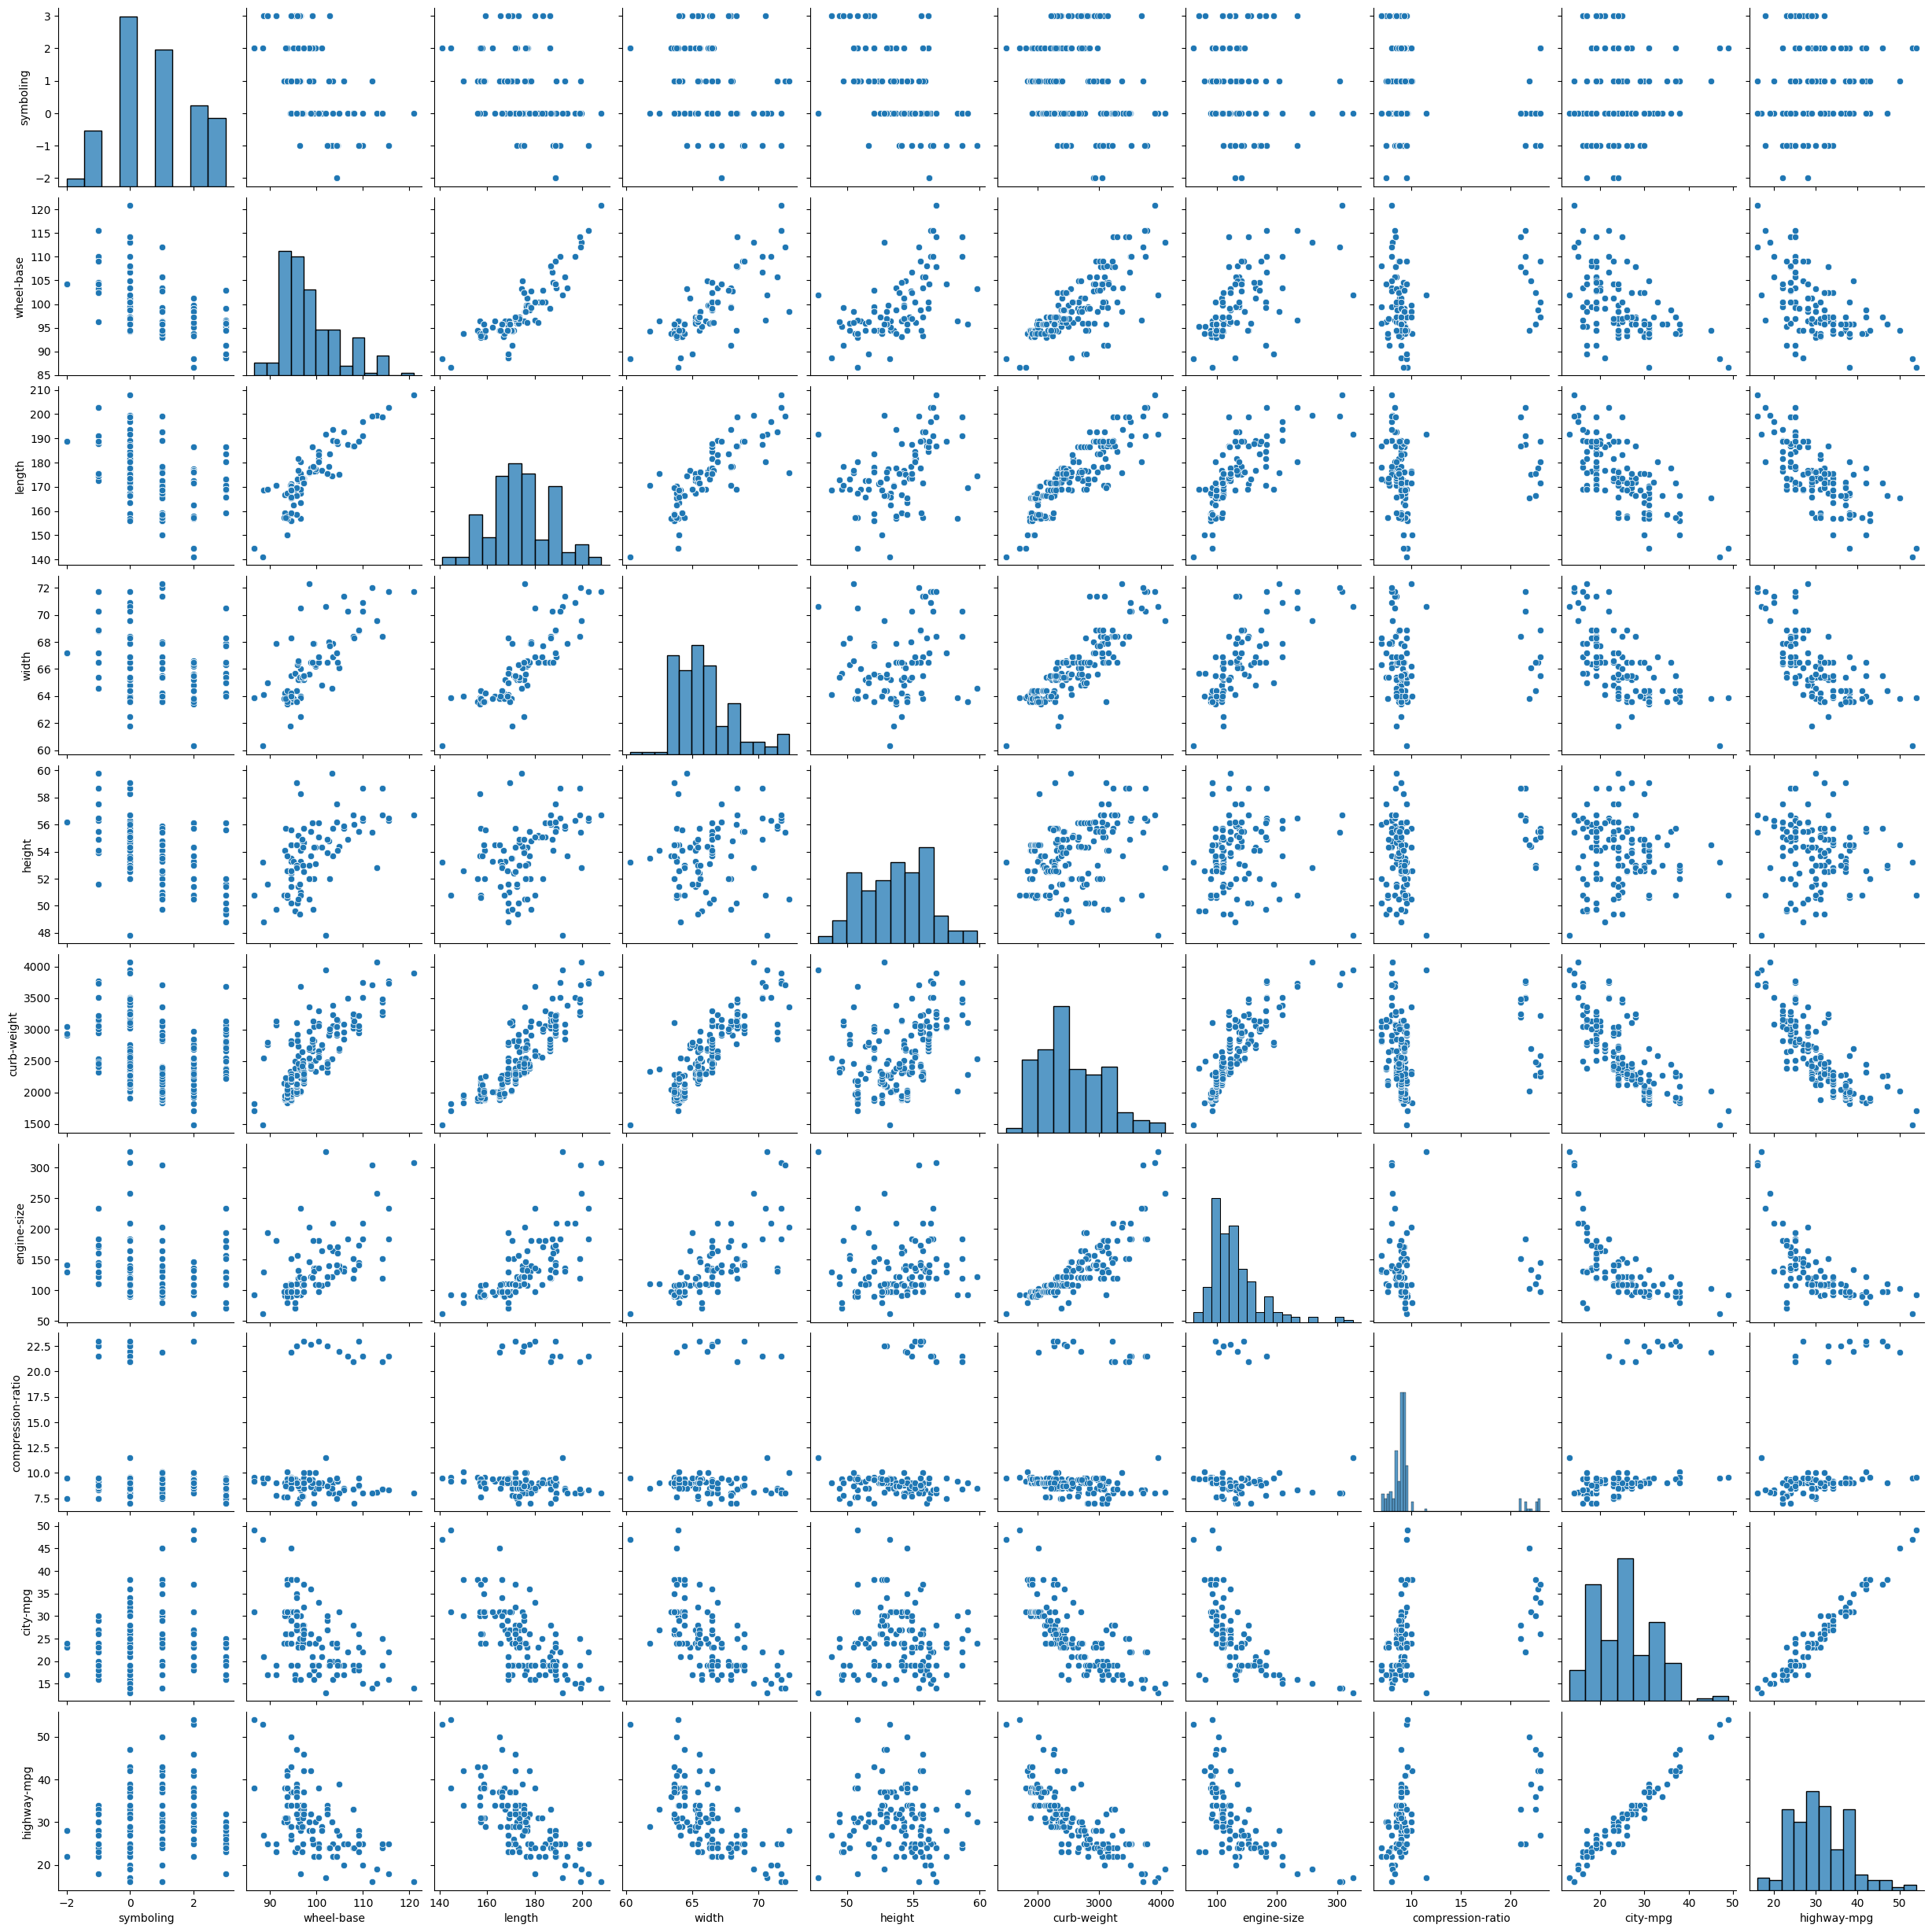

In [6]:
sns.pairplot(data)

In [7]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
# Because the target feature is an object, let us convert it into numerical feature.
# Remove the "?" from "symboling" and "price"
data = data[(data['price'] != '?') & (data['symboling'] != '?')]
data = data.astype({'price': 'float'})

In [9]:
# I decide to build a quick machine learning with the numeric features
num_data = data.select_dtypes(exclude = "object")
num_data.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450.0


In [10]:
num_data.dtypes

symboling              int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
compression-ratio    float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##### Building a Machine Learning Model

In [11]:
seed = np.random.seed(369)
# Target
y = num_data['price']
# Features
X = num_data.drop(columns = 'price', inplace = False)

# Spliting num_data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(160, 10) (160,) (41, 10) (41,)


##### Linear Regression

In [12]:
# create an instance of the object
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)


LinearRegression()

##### Random Forest

In [13]:
# Create an instance of randoom forest
rf = RandomForestRegressor(random_state=seed)

# Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor()

##### Evaluation of models

In [14]:
# Define a function that evaluates models
def evaluate_model(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train = mean_squared_error(y_test, y_test_pred, squared = False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared = False)
    return rmse_train, rmse_test

In [15]:
# Linear Regression Evaluation
evaluate_model(lr)

(2899.9625578467176, 2899.9625578467176)

In [16]:
# Random Forest evaluation
evaluate_model(rf)

(1747.2877922013536, 1747.2877922013536)

Here we can notice that the random forest model is better than the linear regression. Thus, we will build the streamlit application with that one.

Before deploying our model into streamlit application, let's save our model

In [17]:
# Using Joblib
import joblib
joblib.dump(rf, "final_model.joblib")

['final_model.joblib']

In [19]:
# Using Pickle
import pickle

pickle.dump(rf, open('final_model_2', 'wb'))